# Homework 4
## Matthew Pronyshyn 1002365978

In [1]:
from scipy import stats; 
import numpy as np; 
import matplotlib.pyplot as plt 
import pymc as pm;
import arviz as az

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Part 1, Low number of samples, n = 100

In [17]:
n = 100

loc_true,scale_true,df_true = 10,2,15 # True values data will be from... IRL, we don't know these values
x = stats.t(df=df_true, loc=loc_true, scale=scale_true).rvs(n) # Data from location-scale-t distribution

In [18]:
model = pm.Model()
with model: 
    scale_prior = pm.HalfNormal('scale_prior', sigma=5)
    loc_prior = pm.Normal('loc_prior', mu=0, sigma=10)
    df_prior = pm.DiscreteUniform('df_prior', lower=1, upper=100)

    x_obs = pm.StudentT('likelihood', nu=df_prior, mu=loc_prior, sigma=scale_prior, observed=x)
    

In [19]:
with model:
    idata_MH = pm.sample()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [scale_prior, loc_prior]
>Metropolis: [df_prior]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 15 seconds.


MH Split-Rhats {'loc_prior': 1.0014, 'df_prior': 1.0011, 'scale_prior': 1.0012}


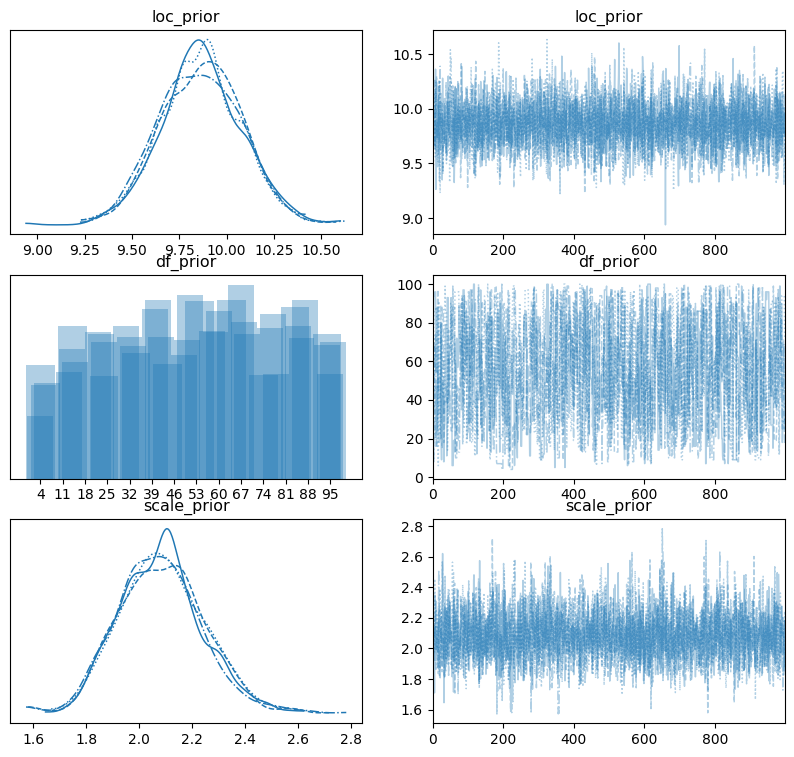

In [20]:
az.plot_trace(idata_MH, figsize=(10, 9));
print('MH Split-Rhats',{k: np.round(v.values,4) for k,v in az.rhat(idata_MH).items()})

In [21]:
az.summary(idata_MH, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
loc_prior,9.86,0.21,9.46,10.26,0.00,0.00,4068.32,3039.58,1.0
df_prior,56.06,27.00,12.00,99.00,0.93,0.66,808.73,683.37,1.0
scale_prior,2.08,0.16,1.80,2.39,0.00,0.00,3112.28,2641.28,1.0


c:\Users\Matth\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\forestplot.py:545: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
  for _, sub_data in grouped_datum:
c:\Users\Matth\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\forestplot.py:545: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
  for _, sub_data in grouped_datum:
c:\Users\Matth\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\forestplot.py:545: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
  for _, sub_data in grouped_datum:
c:\Users\Matth\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\forestplot.py:545: 

array([<Axes: title={'center': '95.0% HDI'}>], dtype=object)

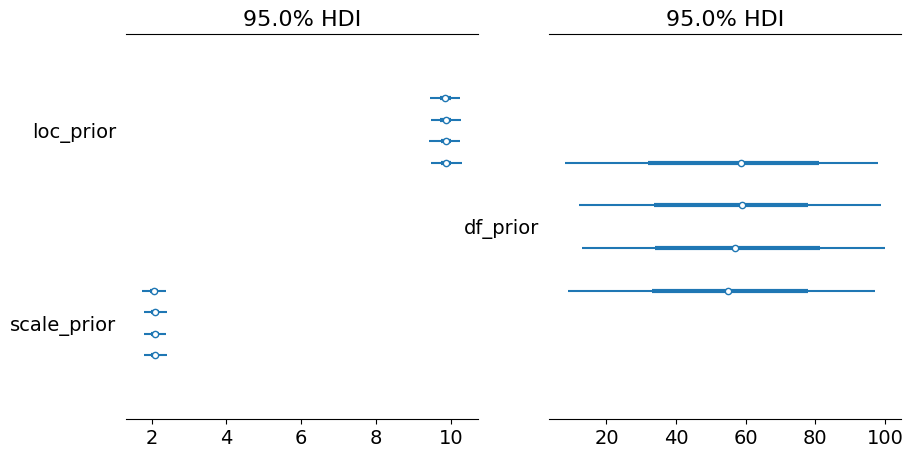

In [22]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
az.plot_forest(idata_MH, var_names=["loc_prior","scale_prior"], combined=False, hdi_prob=0.95,ax=ax[0])
az.plot_forest(idata_MH, var_names=["df_prior"], combined=False, hdi_prob=0.95, ax=ax[1])


## Larger number of samples, n = 10000

In [14]:
n = 10000

loc_true,scale_true,df_true = 10,2,15 # True values data will be from... IRL, we don't know these values
x = stats.t(df=df_true, loc=loc_true, scale=scale_true).rvs(n) # Data from location-scale-t distribution

model_2 = pm.Model()
with model_2: 
    scale_prior = pm.HalfNormal('scale_prior', sigma=5)
    loc_prior = pm.Normal('loc_prior', mu=0, sigma=10)
    df_prior = pm.DiscreteUniform('df_prior', lower=1, upper=100)

    x_obs = pm.StudentT('likelihood', nu=df_prior, mu=loc_prior, sigma=scale_prior, observed=x)

with model_2:
    idata_MH_2 = pm.sample()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [scale_prior, loc_prior]
>Metropolis: [df_prior]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 21 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


MH Split-Rhats {'loc_prior': 1.0011, 'df_prior': 1.013, 'scale_prior': 1.0045}


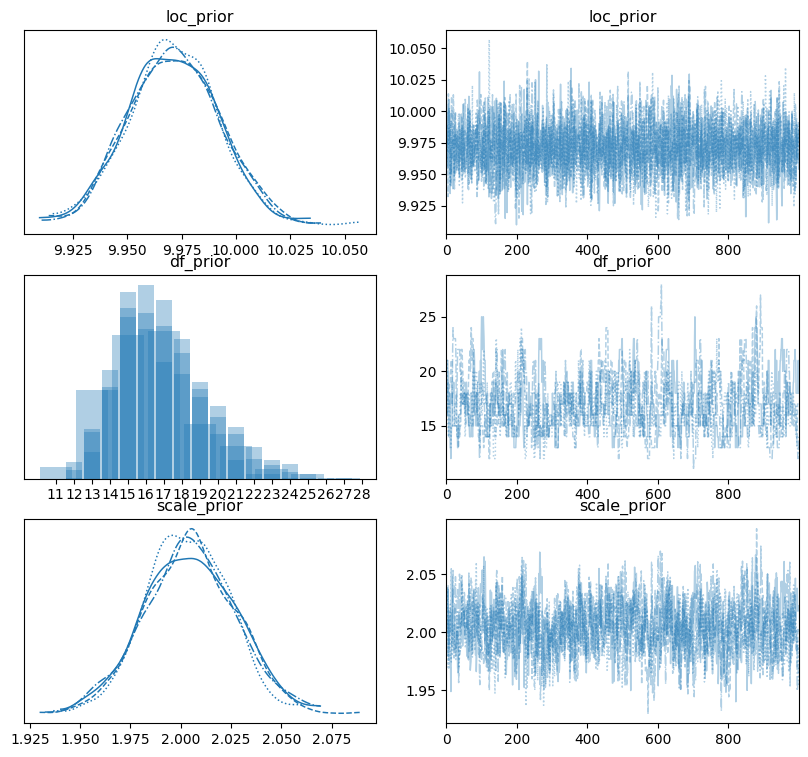

In [15]:
az.plot_trace(idata_MH_2, figsize=(10, 9));
print('MH Split-Rhats',{k: np.round(v.values,4) for k,v in az.rhat(idata_MH_2).items()})

In [16]:
az.summary(idata_MH_2, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
loc_prior,9.97,0.02,9.93,10.01,0.00,0.0,3050.16,2611.03,1.00
df_prior,16.85,2.46,13.00,21.00,0.14,0.1,328.33,562.68,1.01
scale_prior,2.00,0.02,1.96,2.05,0.00,0.0,496.82,984.44,1.00


With an initial sample size of 100, our inference for the degrees of freedom parameter was poor, as shown by a 94% credible interval ranging from 12 to 99. This wide interval indicates a high level of uncertainty about the parameter's true value. However, when we increased the sample size to 10,000, the inference accuracy improved significantly. The 94% credible interval narrowed to [13, 21], which closely includes the true value of 15. This improvement in inference occurred despite a reduction in the effective sample size as we increased the sample size.

This counterintuitive outcome suggests that the larger dataset provided more detailed information, leading to a posterior distribution that more accurately reflects the true parameter values. The larger amount of data might have made the posterior distribution too sharp, making it harder for the sampling process to efficiently explore it. Thus, even though the effective sample size was reduced, the inference became more accurate because the posterior distribution was a better representation of the true parameter values.

## Part 2

## a) b)

In [25]:
az.summary(idata_MH, round_to=2)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
loc_prior,9.86,0.21,9.46,10.26,0.00,0.00,4068.32,3039.58,1.0
df_prior,56.06,27.00,12.00,99.00,0.93,0.66,808.73,683.37,1.0
scale_prior,2.08,0.16,1.80,2.39,0.00,0.00,3112.28,2641.28,1.0


In [26]:
az.summary(idata_MH_2, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
loc_prior,9.97,0.02,9.93,10.01,0.00,0.0,3050.16,2611.03,1.00
df_prior,16.85,2.46,13.00,21.00,0.14,0.1,328.33,562.68,1.01
scale_prior,2.00,0.02,1.96,2.05,0.00,0.0,496.82,984.44,1.00


Effective sample sizes in both bulk and tail were low for the degrees of freedom parameter in the low sample size model. 

Effective sample sizes lowered across all parameters in the large sample model, with the scale parameter decreasing the most. 

The convergence measures, split $\hat{R}$, for all parameters in both models are lower than 1.05, meaning convergence has been most likely achieved. 